In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Perceptrons

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data
#y = iris.target.astype(np.int)
y = iris.target
#print(y[20:60])
unique, counts = np.unique(y, return_counts=True)
#print (unique)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[5.5, 3.6, 1.2 ,0.5]])

In [3]:

y_pred

array([0])

(50, 4)


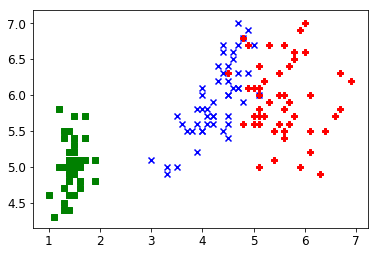

In [4]:
# separate the data into classes based on 'y'
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])
class_2 = np.array([X[i] for i in range(len(X)) if y[i]==2])

print(class_0.shape)
# plot input data
plt.figure()
plt.scatter(class_0[:,2], class_0[:,0], color='green', marker='s')
plt.scatter(class_1[:,2], class_1[:,0], color='blue', marker='x')
plt.scatter(class_2[:,2], class_1[:,0], color='red', marker='P')

Plot functions and their derivatives

In [30]:
def logit(z):
    return (1 / (1 + np.exp(-z)))

def relu(z):
    return np.maximum(0,z)

def derivative(f , z, eps = 0.000001):
    return  ((f(z + eps) - f(z-eps))/ (2 * eps))

def leakyrelu(z , alpha=0.8):
    return np.maximum(alpha * z ,z)
    

In [31]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# print(plt.show())

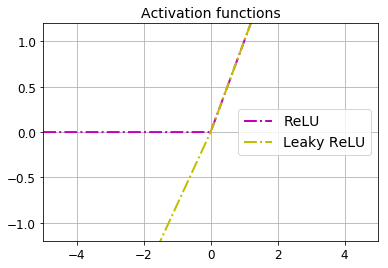

None


In [32]:
plt.subplot(111)
#plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
#plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
#plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, leakyrelu(z), "y-.", linewidth=2, label="Leaky ReLU")
plt.grid(True)
plt.axis([-5, 5, -1.2, 1.2])
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
print(plt.show())

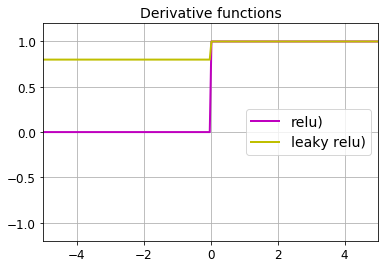

None


In [33]:
plt.subplot(111)
#plt.plot(z, derivative(np.sign,z), "r-", linewidth=2, label="Step)")
#plt.plot(z, derivative(logit,z), "g-", linewidth=2, label="Logit)")
#plt.plot(z, derivative(np.tanh,z), "b-", linewidth=2, label="tanh)")
plt.plot(z, derivative(relu,z), "m-", linewidth=2, label="relu)")
plt.plot(z, derivative(leakyrelu,z), "y-", linewidth=2, label="leaky relu)")
plt.grid(True)
plt.axis([-5, 5, -1.2, 1.2])
plt.legend(loc="center right", fontsize=14)
plt.title("Derivative functions", fontsize=14)
print(plt.show())

In [21]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [22]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [23]:
print(X_train.shape)

(55000, 784)


In [24]:
import tensorflow as tf
config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)

dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001705CDCBE10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\partha\\AppData\\Local\\Temp\\tmpdgejl844'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppo

INFO:tensorflow:global_step/sec: 196.714
INFO:tensorflow:loss = 0.0126797, step = 6901 (0.508 sec)
INFO:tensorflow:global_step/sec: 194.413
INFO:tensorflow:loss = 0.0166421, step = 7001 (0.515 sec)
INFO:tensorflow:global_step/sec: 189.848
INFO:tensorflow:loss = 0.00448675, step = 7101 (0.526 sec)
INFO:tensorflow:global_step/sec: 182.329
INFO:tensorflow:loss = 0.0508161, step = 7201 (0.548 sec)
INFO:tensorflow:global_step/sec: 184.693
INFO:tensorflow:loss = 0.00550252, step = 7301 (0.542 sec)
INFO:tensorflow:global_step/sec: 185.035
INFO:tensorflow:loss = 0.0154965, step = 7401 (0.542 sec)
INFO:tensorflow:global_step/sec: 181.33
INFO:tensorflow:loss = 0.004822, step = 7501 (0.551 sec)
INFO:tensorflow:global_step/sec: 172.104
INFO:tensorflow:loss = 0.0131625, step = 7601 (0.579 sec)
INFO:tensorflow:global_step/sec: 152.266
INFO:tensorflow:loss = 0.00680886, step = 7701 (0.657 sec)
INFO:tensorflow:global_step/sec: 168.178
INFO:tensorflow:loss = 0.00376618, step = 7801 (0.597 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 237.099
INFO:tensorflow:loss = 0.00242632, step = 15101 (0.433 sec)
INFO:tensorflow:global_step/sec: 223.376
INFO:tensorflow:loss = 0.00159225, step = 15201 (0.432 sec)
INFO:tensorflow:global_step/sec: 230.469
INFO:tensorflow:loss = 0.0014488, step = 15301 (0.437 sec)
INFO:tensorflow:global_step/sec: 228.785
INFO:tensorflow:loss = 0.00376972, step = 15401 (0.434 sec)
INFO:tensorflow:global_step/sec: 231.458
INFO:tensorflow:loss = 0.00406733, step = 15501 (0.432 sec)
INFO:tensorflow:global_step/sec: 228.187
INFO:tensorflow:loss = 0.00472252, step = 15601 (0.438 sec)
INFO:tensorflow:global_step/sec: 223.356
INFO:tensorflow:loss = 0.0146699, step = 15701 (0.448 sec)
INFO:tensorflow:global_step/sec: 231.272
INFO:tensorflow:loss = 0.00153426, step = 15801 (0.450 sec)
INFO:tensorflow:global_step/sec: 227.899
INFO:tensorflow:loss = 0.000447847, step = 15901 (0.437 sec)
INFO:tensorflow:global_step/sec: 223.346
INFO:tensorflow:loss = 0.00656253, step = 16001 (0.

INFO:tensorflow:loss = 0.00217089, step = 23201 (0.455 sec)
INFO:tensorflow:global_step/sec: 223.204
INFO:tensorflow:loss = 0.00169613, step = 23301 (0.432 sec)
INFO:tensorflow:global_step/sec: 187.729
INFO:tensorflow:loss = 0.000720154, step = 23401 (0.533 sec)
INFO:tensorflow:global_step/sec: 199.431
INFO:tensorflow:loss = 0.000805685, step = 23501 (0.501 sec)
INFO:tensorflow:global_step/sec: 205.846
INFO:tensorflow:loss = 0.000631053, step = 23601 (0.501 sec)
INFO:tensorflow:global_step/sec: 193.431
INFO:tensorflow:loss = 0.000255326, step = 23701 (0.501 sec)
INFO:tensorflow:global_step/sec: 212.812
INFO:tensorflow:loss = 0.00180432, step = 23801 (0.470 sec)
INFO:tensorflow:global_step/sec: 175.297
INFO:tensorflow:loss = 0.000976085, step = 23901 (0.586 sec)
INFO:tensorflow:global_step/sec: 182.553
INFO:tensorflow:loss = 0.00113664, step = 24001 (0.532 sec)
INFO:tensorflow:global_step/sec: 185.596
INFO:tensorflow:loss = 0.000741892, step = 24101 (0.539 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.000460989, step = 31301 (0.632 sec)
INFO:tensorflow:global_step/sec: 162.169
INFO:tensorflow:loss = 0.000649023, step = 31401 (0.615 sec)
INFO:tensorflow:global_step/sec: 163.365
INFO:tensorflow:loss = 0.000197947, step = 31501 (0.612 sec)
INFO:tensorflow:global_step/sec: 156.2
INFO:tensorflow:loss = 6.59552e-05, step = 31601 (0.644 sec)
INFO:tensorflow:global_step/sec: 188.355
INFO:tensorflow:loss = 0.000625275, step = 31701 (0.527 sec)
INFO:tensorflow:global_step/sec: 153.083
INFO:tensorflow:loss = 9.4202e-05, step = 31801 (0.655 sec)
INFO:tensorflow:global_step/sec: 158.057
INFO:tensorflow:loss = 0.000756386, step = 31901 (0.633 sec)
INFO:tensorflow:global_step/sec: 187.118
INFO:tensorflow:loss = 0.000197061, step = 32001 (0.535 sec)
INFO:tensorflow:global_step/sec: 163.231
INFO:tensorflow:loss = 0.000425281, step = 32101 (0.613 sec)
INFO:tensorflow:global_step/sec: 188
INFO:tensorflow:loss = 0.00102074, step = 32201 (0.531 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.000639012, step = 39401 (0.548 sec)
INFO:tensorflow:global_step/sec: 162.017
INFO:tensorflow:loss = 0.000241011, step = 39501 (0.602 sec)
INFO:tensorflow:global_step/sec: 170.622
INFO:tensorflow:loss = 0.000744708, step = 39601 (0.586 sec)
INFO:tensorflow:global_step/sec: 193.434
INFO:tensorflow:loss = 0.000178735, step = 39701 (0.517 sec)
INFO:tensorflow:global_step/sec: 212.689
INFO:tensorflow:loss = 0.00115475, step = 39801 (0.470 sec)
INFO:tensorflow:global_step/sec: 223.252
INFO:tensorflow:loss = 0.00126455, step = 39901 (0.448 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\partha\AppData\Local\Temp\tmpdgejl844\model.ckpt.
INFO:tensorflow:Loss for final step: 0.000402969.


SKCompat()

In [25]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\partha\AppData\Local\Temp\tmpdgejl844\model.ckpt-40000


0.98209999999999997

Use Plain Tensorflow

In [26]:
import tensorflow as tf
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [27]:

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [28]:
def neuron_layer(X, n_neurons, name, activation=None):
    n_inputs = int(X.get_shape()[1])
    stddev = 2 / np.sqrt(n_inputs)
    init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
    W = tf.Variable(init, name="kernel")
    b = tf.Variable(tf.zeros([n_neurons]), name="bias")
    Z = tf.matmul(X, W) + b
    if activation is not None:
        return (activation(Z))
    else:
        return Z

In [40]:
with tf.name_scope("dnn"):
    #hidden1 = neuron_layer(X, n_hidden1, name = "hidden1", activation=tf.nn.relu)
    #hidden2 = neuron_layer(hidden1, n_hidden2, name = "hidden2", activation=tf.nn.relu)
    hidden1 = neuron_layer(X, n_hidden1, name = "hidden1", activation=tf.sigmoid)
    hidden2 = neuron_layer(hidden1, n_hidden2, name = "hidden2", activation=tf.sigmoid)
    logits = neuron_layer(hidden2, n_outputs, name = "outputs")

In [41]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")



In [42]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [43]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [44]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [45]:
n_epochs = 10
batch_size = 50

In [46]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.7 Test accuracy: 0.6455
1 Train accuracy: 0.76 Test accuracy: 0.7562
2 Train accuracy: 0.84 Test accuracy: 0.8167
3 Train accuracy: 0.88 Test accuracy: 0.8523
4 Train accuracy: 0.88 Test accuracy: 0.8654
5 Train accuracy: 0.86 Test accuracy: 0.8777
6 Train accuracy: 0.84 Test accuracy: 0.8844
7 Train accuracy: 0.82 Test accuracy: 0.8901
8 Train accuracy: 0.88 Test accuracy: 0.895
9 Train accuracy: 0.92 Test accuracy: 0.8975
10 Train accuracy: 0.98 Test accuracy: 0.9013
11 Train accuracy: 0.88 Test accuracy: 0.9031
12 Train accuracy: 0.86 Test accuracy: 0.9038
13 Train accuracy: 0.9 Test accuracy: 0.906
14 Train accuracy: 0.94 Test accuracy: 0.9071
15 Train accuracy: 0.8 Test accuracy: 0.9091
16 Train accuracy: 0.94 Test accuracy: 0.9102
17 Train accuracy: 0.92 Test accuracy: 0.9126
18 Train accuracy: 0.9 Test accuracy: 0.9124
19 Train accuracy: 0.92 Test accuracy: 0.9132
20 Train accuracy: 0.94 Test accuracy: 0.9147
21 Train accuracy: 0.92 Test accuracy: 0.9172
22 T

In [38]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(Z.shape)
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
(20, 10)


In [37]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
